### This is the Petrol consumption dataset. Here target variable is Petrol_Consumption and the rest are independent variables. Let us create models using OLS(Stats) & Gradient descent(Scikit learn) and compare them to get a glimpse of which model gives us better results in terms of accuracy.

### Let's perform EDA first

#### Step 1: Download all the libraries which we generally use while performing EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import norm
from collections import Counter

#### Step 2: Import the data set on which EDA has to be performed

In [2]:
dataset = pd.read_csv('petrol_consumption.csv')

#### Step 3: Analyse the dataset and get to know which type of problem it is
    a. We are performing EDA on Petrol consumption dataset.
    b. The main intention of building a model on Petrol consumption dataset is to predict petrol consumption for every state in US based on the data we have. Though state names are not specified in the dataset, we can get to know the info by going through documentation in Kaggle.
    c. This is a Regression problem with numerical & continuous data.

#### Step 4: Fetch a few rows to get a gist of the attributes in the data set, whether there are any attributes which are not adding value to the target variable, etc.

In [3]:
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


#### Based on the data above, we can confirm that all the attributes are giving information related to Petrol consumption. So, at this point there is no need to remove any attribute.

#### Step 5: Get to know the structure of the data set using 'info()'method

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


#### By looking at the data above, we can say that all the attributes are numerical and continuous. Also, none of the attributes have null values.

#### Step 6: Get the 6-point summary using 'describe()' method

In [5]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


#### By looking at values below, there are a few interesting points to note:
    a. Values in all the variables except 'Paved_Highways' are symmetric, i.e. Mean and Median are very close
    b. 'Paved_Highways' is Skewed a bit towards the right

#### Step 7: Since we don't have any categorical attributes, we can skip to univariate analysis on numerical attributes.

#### Step 8: Check the type of distribution continuous attributes have and compare it with Normal distribution. We can do this by plotting Histogram using 'distplot()' method. 

/Users/Surya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Petrol_tax', ylabel='Density'>

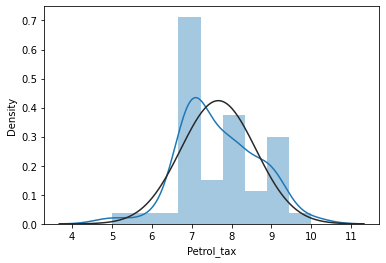

In [6]:
sns.distplot(dataset['Petrol_tax'],fit=norm)

/Users/Surya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Average_income', ylabel='Density'>

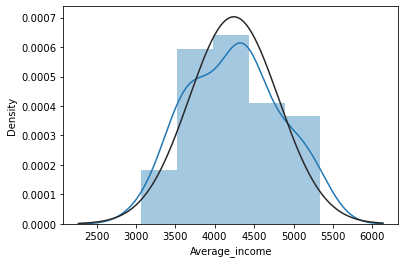

In [7]:
sns.distplot(dataset['Average_income'],fit=norm)

/Users/Surya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Paved_Highways', ylabel='Density'>

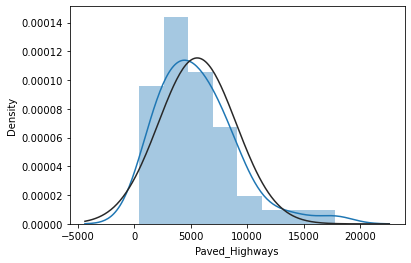

In [8]:
sns.distplot(dataset['Paved_Highways'],fit=norm)

/Users/Surya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Population_Driver_licence(%)', ylabel='Density'>

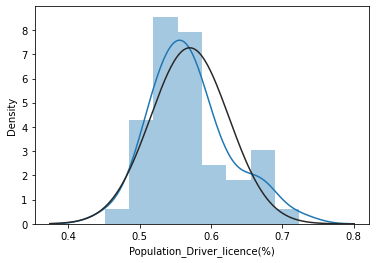

In [9]:
sns.distplot(dataset['Population_Driver_licence(%)'],fit=norm)

/Users/Surya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Petrol_Consumption', ylabel='Density'>

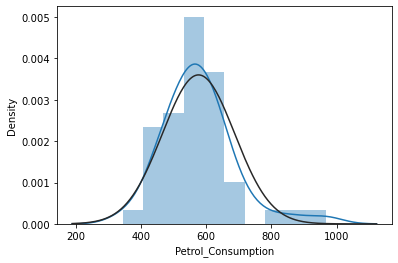

In [10]:
sns.distplot(dataset['Petrol_Consumption'],fit=norm)

#### By looking at the graphs above, we can say that apart from a few minor mismatches, the probability distribution every variable is mostly similar to Normal distribution.

#### Step 9: Identification and treatment of Missing values. As we already know, there are no missing values in the data set. So, we can proceed with further steps.

#### Step 10: Identification and treatment of Outliers. By having a look at the data, we can say that there may be mathematical outliers in all the attributes apart from 'Average_income'. But while looking at the values closely, we can say that there are no unreal or imaginary values. So, we can skip this step and proceed with further steps. 

#### Step 11: This is the last step of EDA. In this step we try to find the duplicate rows using 'duplicated()' function.

In [11]:
# Check for duplicates
duplicate = dataset[dataset.duplicated()]

# This will fetch rows which are duplicate. As seen below, there are no duplicate rows in the Dataframe.
duplicate

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption


#### Since there are no duplicates, we can now move on to model building steps.

### Let's start with model biulding steps.

#### Step 1: Since we are trying to build a Linear Regression model, let's check the correlation values. Plot 'pairplot()' and 'heatmap()' and check the correlation between each of the independent variables and Target variable or other independent variables.

#### In this dataset, we don't have any attribute with categorical data. If we would have had categorical data, we should have converted categorical data to Numerical by setting a pattern and then proceed with Step 3.

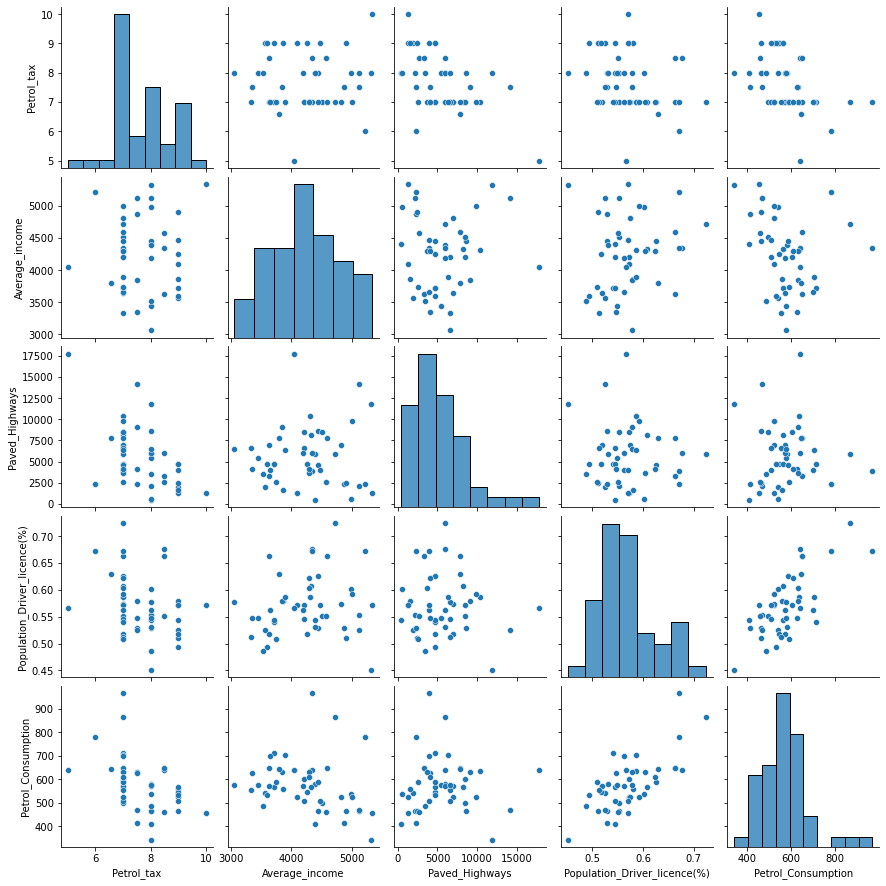

In [12]:
sns.pairplot(dataset)

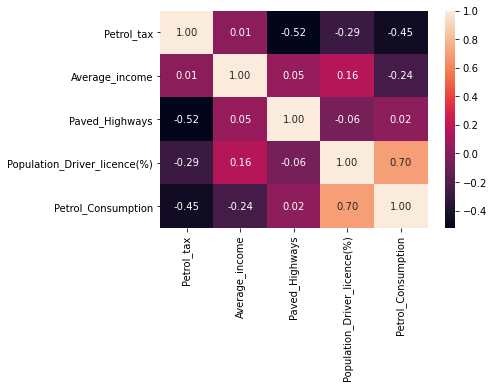

In [13]:
sns.heatmap(dataset.corr(), annot = True , fmt=".2f")
plt.show()

#### By looking at the 'pairplot()' and 'heatmap()' below, we can say below points:
    a. There is strong +ve correlation between 'Population_Driver_licence(%)' and 'Petrol_Consumption'
    b. There is intermediate -ve correlation between 'Petrol_tax' and 'Average_income' individually with 'Petrol_Consumption'
    c. There is very weak correlation between 'Paved_Highways' and 'Petrol_Consumption'
    d. Also, when we see correlation between independent variables, we can say that there is Intermediate relat-ion between 'Paved_Highways' and 'Population_Driver_licence(%)' individually with 'Petrol_tax'

#### Now that we have noted correlation values, let's proceed with model building.

#### Step 2: Let's create new dataframes X and Y, one with independent attributes and another with the target arribute so that we can randomly split train data and test data using 'train_test_split()' in 'sklearn.model_selection' library.

In [14]:
#Creating new dataframe X and Y, one with independent attributes and another with the target arribute 
X = dataset[['Petrol_tax','Average_income','Population_Driver_licence(%)','Paved_Highways']]
Y = dataset['Petrol_Consumption']

In [15]:
#Splitting train data and test data using 'train_test_split()' in 'sklearn.model_selection' library
from sklearn.model_selection import train_test_split

#test_size=0.2 represent that the data has to be split in such a way that 20% is test data and 80% is train data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=13)

In [16]:
y_train

24    460
45    510
15    635
36    640
17    714
40    587
5     457
3     414
7     467
33    628
12    525
8     464
42    632
47    524
1     524
28    574
30    571
22    464
43    591
31    554
21    540
19    640
32    577
39    968
11    471
9     498
46    610
13    508
37    704
2     561
26    577
35    644
25    566
34    487
38    648
16    603
10    580
18    865
Name: Petrol_Consumption, dtype: int64

In [17]:
y_test

0     541
41    699
4     410
6     344
14    566
29    534
23    547
27    631
44    782
20    649
Name: Petrol_Consumption, dtype: int64

#### Step 3: Let's create Gradient Descent model using 'LinearRegression()' from the Scikit Learn library. In case of OLS, we have to use Stats library.

In [18]:
from sklearn.linear_model import LinearRegression

# 'fit_intercept=True' is to enable constant 
regressor = LinearRegression(fit_intercept=True)

# Passing Dataset with Independent variables and Dataset with Dependent variable as X and Y
# This will create an equation with best fit line following OLS model
regressor.fit(X_train, y_train)

LinearRegression()

In [19]:
# Fetching co-efficient value for each Independent variable
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-40.214615
Average_income,-0.062788
Population_Driver_licence(%),1426.621220
Paved_Highways,-0.003358


In [20]:
#Fetching Constant value
regressor.intercept_

353.49729129559523

#### Step 4: Calculate Predicted values for train data based on the approximate co-efficients produced by the model

In [21]:
# Calculating Predicted values for train data
y_pred = regressor.predict(X_train)
y_pred

array([501.75318134, 511.88861177, 602.15179804, 646.19789721,
       593.05651563, 670.13661061, 426.06105487, 492.89684077,
       491.66997703, 607.63044299, 565.1525867 , 478.44064336,
       650.05140945, 571.02464073, 546.46620998, 551.94598344,
       559.24740516, 404.87135005, 552.80863328, 572.43466715,
       575.71134779, 684.74937036, 642.13830662, 744.7560876 ,
       431.37205803, 547.6213926 , 677.33050397, 563.2567191 ,
       641.86736818, 571.00372769, 578.94422998, 721.20103277,
       518.07488253, 493.29133418, 718.29319589, 595.36363237,
       492.24238485, 788.89596594])

In [22]:
# Getting a sense of Actual and Predicted values for the train data
df = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred})
df

,Actual,Predicted
24,460,501.753181
45,510,511.888612
15,635,602.151798
36,640,646.197897
17,714,593.056516
40,587,670.136611
5,457,426.061055
3,414,492.896841
7,467,491.669977
33,628,607.630443


#### Since we have created a Linear Regression model based on Scikit Learn library, we don't have to worry about Assumptions of OLS. We can proceed with the Linear Regression Model Evaluation metrics.

### Linear Regression Model Evaluation Techiniques: 
    a. There are two ways to evaluate Linear Regression models. One is using MAE and the other one is using MSE & RMSE. Which metric to be used is subjective, i.e. depends from case to case. But, these measures will not give an absolute measure.
    b. To get an absolute measure, we'll have to calculate MAPE(Mean Absolute Percentage Error). We calculate this to get difference in terms of percentages.

#### Step 5: Calculate MAE, MSE, RMSE and MAPE for Train data

In [23]:
# Model evaluation metrics - Scikit learn model

y_pred = regressor.predict(X_train)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

# Function to calculate MAPE(Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Model evaluation metrics - Scikit learn model
print('Mean Absolute percentage error:', mean_absolute_percentage_error(y_train, y_pred))

Mean Absolute Error: 46.35023352889988
Mean Squared Error: 3766.3675675584586
Root Mean Squared Error: 61.37073869164733
Mean Absolute percentage error: 7.7194871947663


#### Step 5 (continuation): Calculate MAE, MSE, RMSE and MAPE for Train data

In [24]:
# Model evaluation metrics - Scikit learn model

y_pred_test = regressor.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

# Function to calculate MAPE(Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Model evaluation metrics - Scikit learn model
print('Mean Absolute percentage error:', mean_absolute_percentage_error(y_test, y_pred_test))

Mean Absolute Error: 64.21137215976034
Mean Squared Error: 4960.283075036839
Root Mean Squared Error: 70.42927711567711
Mean Absolute percentage error: 12.194036441841423


#### By looking at the MAPE values for Train and Test data, we can say that predicted values of Train data are a bit more accurate when compared to predicted values of Test data. Hence there is no problem of Overfitting. Let's build a few more models to check whether we can get better models.

#### Step 6: Build Linear Regression model based on OLS

#### In Scikit learn based Gradient Descent model, if parameter fit_intercept is set to True, algorithm will create a model with constant. But, in Stats based OLS model, we have to create a new attribute with some constant value other than 0 in X-train & X-test dataframes and then do the modelling so that algorithm creates model with constant. So, create a new attribute in X-train & X-test dataframes with a constant value other than 0. It is best practice to take constant value as 1.  'sm.add_constant()' creates new attribute with value as 1.

In [25]:
# X-test dataframe before constant as attribute
X_test

,Petrol_tax,Average_income,Population_Driver_licence(%),Paved_Highways
0,9.0,3571,0.525,1976
41,7.0,3656,0.563,3985
4,8.0,4399,0.544,431
6,8.0,5319,0.451,11868
14,7.0,4332,0.608,8159
29,9.0,3601,0.493,4650
23,9.0,4258,0.517,4686
27,7.5,3846,0.579,9061
44,6.0,5215,0.672,2302
20,7.0,4593,0.663,7834


In [26]:
import statsmodels.api as sm

In [27]:
# Creating constant as new attribute using 'sm.add_constant()'
# X_endog represents X endogenous. Endogenous is a fancy term for anything that originates internally.
X_endog_train = sm.add_constant(X_train)
X_endog_test = sm.add_constant(X_test)

In [28]:
# X-test dataframe after adding constant as attribute
X_endog_test

,const,Petrol_tax,Average_income,Population_Driver_licence(%),Paved_Highways
0,1.0,9.0,3571,0.525,1976
41,1.0,7.0,3656,0.563,3985
4,1.0,8.0,4399,0.544,431
6,1.0,8.0,5319,0.451,11868
14,1.0,7.0,4332,0.608,8159
29,1.0,9.0,3601,0.493,4650
23,1.0,9.0,4258,0.517,4686
27,1.0,7.5,3846,0.579,9061
44,1.0,6.0,5215,0.672,2302
20,1.0,7.0,4593,0.663,7834


In [29]:
res = sm.OLS(y_train, X_endog_train)
res

In [30]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Petrol_Consumption   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     16.94
Date:                Sun, 07 Nov 2021   Prob (F-statistic):           1.22e-07
Time:                        23:43:31   Log-Likelihood:                -210.36
No. Observations:                  38   AIC:                             430.7
Df Residuals:                      33   BIC:                             438.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          353.4973    196.097      1.803      0.081     -45.465     752.460
Petrol_tax                     -40.2146     15.405     -2.611      0.013     -71.556      -8.873
Average_income                  -0.0628      0.020     -3.172      0.003      -0.103      -0.023
Population_Driver_licence(%)  1426.6212    216.537      6.588      0.000     986.074    1867.169
Paved_Highways                  -0.0034      0.004     -0.828      0.414      -0.012       0.005
==============================================================================
Omnibus:                       17.059   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.210
Skew:                           1.321   Prob(JB):                     1.50e-05
Kurtosis:                       5.654   Cond. No.                     1.91e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Step 7: Analyse the summary of the model built. Summary has three blocks initial, middle and final. Let's analyse it one by one. 

#### Step 7(continuation): Let's analyse middle block first. By analysing middle block, we can get to know below info.
    a. The attributes in middle block are Co-efficients, standard error of co-efficients, t-score, P-value(proba-bility) for corresponding t-score, Lower confidence Interval and Upper confidence Interval.
    
    b. Here there is possibility of conducting Z-test and fetching z-score. But we didn't do that because to    conduct a Z-test, residuals must be closer to be Normal. Though in this case residuals are closer to Normal, in a few other cases it may not. Hence, it is better to conduct t-Test. t-Test doesn't have any such rule.
    
    c. P-value(probability) is calculated based on the Null hypothesis that the corresponding attribute's       co-efficient(β) is zero. So, if the P-value is greater than 0.1, it is better to re-check whether the corres-ponding attribute is significant in model building. If it is insignificant, we may remove the attribute    while building the model. Because P-value greater than 0.1 implies that the test has to be run on a confiden-ce interval which is less than 90%. Confidence interval of 90% is the bench mark as per industry standards.
    
    d. To get to know whether an attribute is significant in model building, we may use our Industry experience sometimes. But a statistical way of getting it is to build two models one with the attribute and another    without. If the model with the attribute has significant higher accuracy when compared to the accuracy of   model without the attribute, we consider the attribute as significant.

##### Based on the P-values in the below summary we can get to know below things. 
    a. If we conduct a test at 95% Confidence Interval, 'Petrol_tax', 'Average_income' and 'Population_Driver_li-cence(%)' are the significant attributes because the P-value of each of them is less than 0.05.
    b. If we conduct a test at 90% Confidence Interval, 'const', 'Petrol_tax', 'Average_income' and 'Population_Driver_licence(%)' are the significant attributes
    c. To accept 'Paved_Highways' as significant attribute we have to conduct a test at 68% confidence Interval. So, it is better to check whether 'Paved_Highways' is significant in model building. But, unfortunately sometimes we may need to consider these kind of attributes in Model building. For example, in a Marketing model a firm is spending money heavily across 5 channels. If any channel gives a P-value of 0.3, we may not remove that channel while building the model.

#### Step 7(continuation): Let's analyse initial block next. By analysing initial block, we can get to know below info.
    a. P-value for F-statistic is calculated based on the Null hypothesis that the co-efficients(β) of all the attributes are zero. If the P-value for F-statistic is less than 0.1, the model we have built is a good one. This is again based on the Confidence Interval.
    b. Check the values of 'R-squared' and 'Adj. R-squared' in "Statistics class 26 & 27" file.

##### Based on the values in the initial block we can get to know below things.
    a. Since the P-value for F-statistic is close to 10 to the power of (-7), our model is a good one.
    b. Since the number of attributes in data set are very few, let us check R-squared. Since R-squared value is 0.666, our model is an average one but it can be better.

#### Step 7(continuation): Let's analyse final block now. Final block is all about tests running on Residuals. By analysing final block, we can get to know below info.
    a. Skewness and Kurtosis will tell how the residual values are distributed. A perfect Normal distribution   will have Skewness as 0 and Kurtosis as 3.
    b. Omnibus and Jarque-Bera(JB) test confirm the same idea of Skewness and Kurtosis. For a perfect Normal dis-tribution, Omnibus & Jarque-Bera(JB) values should be close to zero and Prob(Omnibus) & Prob(JB) should be close to one.
    c. Durbin-Watson test confirm whether there is Auto-correlation among residuals. A value between 0 and 4    will confirm that the residuals are not Auto-correlated.
    d. 'Cond. No' will tell whether there is Multi-collinearity. 'Cond. No' should be less than 30. Higher the  'Cond. No', greater the Multi-collinearity.

##### Based on the values in the initial block we can get to know below things.
    a. Based on Skew and Kurtosis values, we can say that there is significant deviation from Normalcy.
    b. Based on Omnibus, Prob(Omnibus), Jarque-Bera(JB) and Prob(JB) we can say that the distribution of residua-ls is not close to Normal distribution.
    c. Based on value of Durbin-Watson test, we can say that there is no Auto-correlation between residuals.
    d. Based on value of 'Cond. No', we can say that there is Multi-collinearity among attributes.

##### After a detailed analysis of the bottom block, we can conclude that many of the assumptions of OLS are not being met. So, we cannot rely on the estimated co-efficient values. In this case we have two options.
    a. Stick to the Scikit-Learn version of the Co-efficients. Although the estimated co-efficients are similar, the estimation technique is different and there are no assumptions to be met.
    b. Estimate using Non-linear approach. There may be Non-linear approaches which would be more accurate.

##### But, let's complete usual steps of validation for OLS based Linear Regression model before building other models

#### Step 8: Calculate Predicted values for train data based on the approximate co-efficients produced by the model

In [43]:
# Calculating Predicted values for train data
y_pred_endog_train = res.fit().predict(X_endog_train)
y_pred_endog_train

24    501.753181
45    511.888612
15    602.151798
36    646.197897
17    593.056516
40    670.136611
5     426.061055
3     492.896841
7     491.669977
33    607.630443
12    565.152587
8     478.440643
42    650.051409
47    571.024641
1     546.466210
28    551.945983
30    559.247405
22    404.871350
43    552.808633
31    572.434667
21    575.711348
19    684.749370
32    642.138307
39    744.756088
11    431.372058
9     547.621393
46    677.330504
13    563.256719
37    641.867368
2     571.003728
26    578.944230
35    721.201033
25    518.074883
34    493.291334
38    718.293196
16    595.363632
10    492.242385
18    788.895966
dtype: float64

In [44]:
# Getting a sense of Actual and Predicted values for the train data
df = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred_endog_train})
df

,Actual,Predicted
24,460,501.753181
45,510,511.888612
15,635,602.151798
36,640,646.197897
17,714,593.056516
40,587,670.136611
5,457,426.061055
3,414,492.896841
7,467,491.669977
33,628,607.630443


#### Step 9: Perform below tasks to check whether model prediction is right.
    a. Plot a scatter plot for Fitted values(actual values) vs Residuals(errors) to get a sense of residual     distribution
    b. Calculate mean of residuals to check whether the model prediction is right. Model prediction is right    when the mean of residuals for train data is close to zero.
    c. Check whether Residuals are distributed normally using 'distplot()' and 'probplot()'

Text(0, 0.5, 'Residuals')

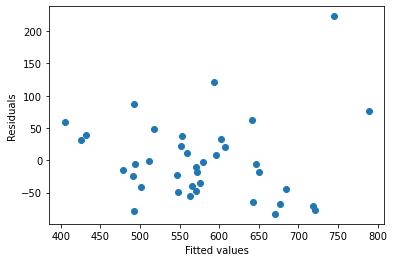

In [45]:
# Plotting scatter plot of residuals
plt.scatter(y_pred_endog_train, (y_train-y_pred_endog_train))
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

##### By looking at the plot above we can say that apart from two residuals all of them are closer to zero.

In [46]:
# Calculating Mean of residuals to check whether the model prediction is right
(y_train-y_pred_endog_train).mean()

6.012238660141042e-11

##### Since the Mean of residuals for train data is a number which is 10 to the power of (-11), it is negligibe. Hence, we can conclude that the model prediction is right.

/Users/Surya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Residuals')

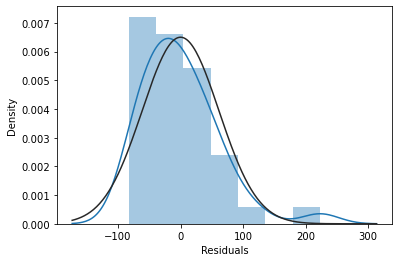

In [47]:
sns.distplot(y_train-y_pred_endog_train , fit=norm);
plt.xlabel('Residuals')

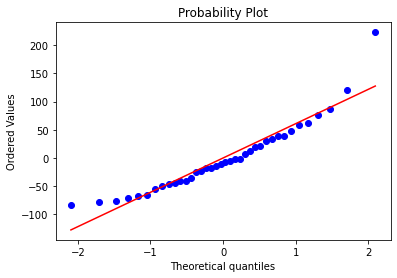

In [48]:
from scipy import stats
stats.probplot(y_train-y_pred_endog_train, plot=plt)
plt.show()

##### Based on the 'distplot()' and 'probplot()' below, we can say that Residuals are approximately normally distributed. Red line in 'probplot()' is the line of normalcy. If most of the points in 'probplot()' are aligned with the line, we can say that Residuals are approximately normally distributed.

#### Step 10: Let's try building other models by altering the input parameters.

##### Based on heatmap plotted above, we got to know that 'Petrol_tax' and 'Paved_Highways' have Intermediate Correlation between them. Let's remove 'Paved_Highways' and build both the Linear Regression models again.

#### Let's start with Scikit learn model

In [53]:
# Removing 'Paved_Highways' from Train data and Test data
X_train_1 = X_train.drop('Paved_Highways', axis=1)
X_test_1 = X_test.drop('Paved_Highways', axis=1)

In [54]:
# 'fit_intercept=True' is to enable constant 
regressor = LinearRegression(fit_intercept=True)

# Passing Dataset with Independent variables and Dataset with Dependent variable as X and Y
# This will create an equation with best fit line following OLS model
regressor.fit(X_train_1, y_train)

LinearRegression()

In [56]:
# Fetching co-efficient value for each Independent variable
coeff_df = pd.DataFrame(regressor.coef_, X_train_1.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-31.952461
Average_income,-0.064837
Population_Driver_licence(%),1453.791163


In [57]:
#Fetching Constant value
regressor.intercept_

264.6773040332906

In [58]:
# Calculating Predicted values for train data
y_pred = regressor.predict(X_train_1)
y_pred

array([497.55632583, 517.00993503, 612.96595492, 665.49552787,
       584.99370278, 662.62396724, 428.90871674, 478.33365813,
       480.65016859, 602.60013215, 563.16684675, 489.7834373 ,
       638.84746893, 578.79405192, 543.36109665, 556.00509452,
       558.06757557, 402.48612942, 536.72178921, 570.70354874,
       561.15761259, 695.84101056, 650.75347698, 736.24139856,
       455.9202465 , 550.95869635, 668.18263979, 560.55741339,
       640.26229076, 569.70940276, 582.17753474, 722.35485007,
       526.70943482, 488.30932163, 721.26278726, 599.87461169,
       494.86809499, 787.78404829])

In [61]:
# Model evaluation metrics(Train data) - Scikit learn model

y_pred = regressor.predict(X_train_1)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

# Function to calculate MAPE(Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Model evaluation metrics - Scikit learn model
print('Mean Absolute percentage error:', mean_absolute_percentage_error(y_train, y_pred))

Mean Absolute Error: 45.610041004648465
Mean Squared Error: 3844.6316774011175
Root Mean Squared Error: 62.005093963327866
Mean Absolute percentage error: 7.497718961673179


In [63]:
# Model evaluation metrics(Test data) - Scikit learn model

y_pred_test = regressor.predict(X_test_1)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

# Function to calculate MAPE(Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Model evaluation metrics - Scikit learn model
print('Mean Absolute percentage error:', mean_absolute_percentage_error(y_test, y_pred_test))

Mean Absolute Error: 62.55200434469358
Mean Squared Error: 4734.841302969784
Root Mean Squared Error: 68.81018313425552
Mean Absolute percentage error: 11.437027978173749


##### By comparing the model evaluation metrics of both the Scikit learn models we have built, we can say that there's no significant difference interms of results.

#### Let's built OLS based Regression model and see whether we get better results.

In [64]:
# Removing 'Paved_Highways' from Train data and Test data
X_endog_train_1 = X_endog_train.drop('Paved_Highways', axis=1)
X_endog_test_1 = X_endog_test.drop('Paved_Highways', axis=1)

In [65]:
res = sm.OLS(y_train, X_endog_train_1)
res

In [66]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Petrol_Consumption   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     22.56
Date:                Mon, 08 Nov 2021   Prob (F-statistic):           3.21e-08
Time:                        00:50:01   Log-Likelihood:                -210.75
No. Observations:                  38   AIC:                             429.5
Df Residuals:                      34   BIC:                             436.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          264.6773    163.403      1.620      0.115     -67.397     596.752
Petrol_tax                     -31.9525     11.683     -2.735      0.010     -55.695      -8.210
Average_income                  -0.0648      0.020     -3.317      0.002      -0.105      -0.025
Population_Driver_licence(%)  1453.7912    213.045      6.824      0.000    1020.832    1886.751
==============================================================================
Omnibus:                       20.317   Durbin-Watson:                   2.150
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.370
Skew:                           1.487   Prob(JB):                     2.54e-07
Kurtosis:                       6.214   Cond. No.                     1.01e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### By comparing the model evaluation metrics of both the OLS based Linear Regression models we have built, we can say that the latest OLS model is a bit worse in terms of output values.

#### Let's give one last try by removing both co-efficient & 'Paved_Highways' and building both the models.

#### Let's start with Scikit learn model

In [67]:
# 'fit_intercept=False' is to disable constant 
regressor = LinearRegression(fit_intercept=False)

# Passing Dataset with Independent variables and Dataset with Dependent variable as X and Y
# This will create an equation with best fit line following OLS model
regressor.fit(X_train_1, y_train)

LinearRegression(fit_intercept=False)

In [68]:
# Fetching co-efficient value for each Independent variable
coeff_df = pd.DataFrame(regressor.coef_, X_train_1.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-21.526899
Average_income,-0.055613
Population_Driver_licence(%),1706.644336


In [69]:
# Calculating Predicted values for train data
y_pred = regressor.predict(X_train_1)
y_pred

array([503.00782959, 531.8273559 , 609.26769649, 633.37099789,
       564.12994864, 670.24814692, 462.13946699, 470.52705975,
       486.48610736, 585.38935773, 561.0370013 , 483.28797395,
       639.28168694, 583.17481043, 554.88945085, 555.7176879 ,
       530.92159916, 406.01555851, 508.01577478, 539.46161535,
       578.06436063, 731.00288043, 643.88214965, 754.53755422,
       449.46351533, 540.45283747, 673.63702626, 545.46833868,
       632.68083375, 581.16679118, 571.27175582, 720.39108714,
       527.73588908, 462.71739914, 746.3727455 , 591.60334889,
       488.10895484, 822.65058004])

In [70]:
# Model evaluation metrics(Train data) - Scikit learn model

y_pred = regressor.predict(X_train_1)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

# Function to calculate MAPE(Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Model evaluation metrics - Scikit learn model
print('Mean Absolute percentage error:', mean_absolute_percentage_error(y_train, y_pred))

Mean Absolute Error: 49.34960629956919
Mean Squared Error: 4141.312824354027
Root Mean Squared Error: 64.35303275179831
Mean Absolute percentage error: 8.165965055218852


In [71]:
# Model evaluation metrics(Test data) - Scikit learn model

y_pred_test = regressor.predict(X_test_1)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

# Function to calculate MAPE(Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Model evaluation metrics - Scikit learn model
print('Mean Absolute percentage error:', mean_absolute_percentage_error(y_test, y_pred_test))

Mean Absolute Error: 68.4169610973407
Mean Squared Error: 5408.643170560821
Root Mean Squared Error: 73.54347809670699
Mean Absolute percentage error: 12.6531011648782


##### By comparing the model evaluation metrics of all three Scikit learn models we have built, we can say that the first Scikit learn model is better in terms of results.

#### Let's built OLS based Regression model and see whether we get better results.

In [73]:
# Removing 'const' from Train data and Test data
X_endog_train_2 = X_endog_train_1.drop('const', axis=1)
X_endog_test_2 = X_endog_test_1.drop('const', axis=1)

In [74]:
res = sm.OLS(y_train, X_endog_train_2)
res

In [75]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Petrol_Consumption   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              963.4
Date:                Mon, 08 Nov 2021   Prob (F-statistic):                    1.11e-33
Time:                        01:03:45   Log-Likelihood:                         -212.17
No. Observations:                  38   AIC:                                      430.3
Df Residuals:                      35   BIC:                                      435.2
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Petrol_tax                     -21.5269      9.973     -2.158      0.038     -41.774      -1.280
Average_income                  -0.0556      0.019     -2.908      0.006      -0.094      -0.017
Population_Driver_licence(%)  1706.6443    148.308     11.507      0.000    1405.564    2007.725
==============================================================================
Omnibus:                       11.477   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.358
Skew:                           1.062   Prob(JB):                      0.00342
Kurtosis:                       4.632   Cond. No.                     5.82e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### By comparing the model evaluation metrics of all three OLS based Linear Regression models we have built, we can say that the latest OLS model is better in terms of output values. But, even this model has not met the assumptions of OLS.

##### By comparing results of all the Linear Regression models we have built, we can conclude that the first Scikit Learn model with all the variables have given us better results. At this point, we have to check whether Non-linear models give better results. If no, it is better to stick with the Linear Regression model and vice versa.